In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble as en
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPClassifier as MLC
import matplotlib.pyplot as plt
import tensorflow
#importing the dataset and loading it
fifa = pd.read_csv("FIFA.csv")
from collections import Counter

In [2]:
fifa.isnull().sum()
fifa.shape
Counter(fifa.Round)

Counter({'3rd Place': 2,
         'Final': 2,
         'Group Stage': 96,
         'Quarter Finals': 8,
         'Round of 16': 16,
         'Semi- Finals': 4})

In [3]:
fifa.Round.replace('3rd Place',3,inplace = True)
fifa.Round.replace('Final',1,inplace = True)
fifa.Round.replace('Group Stage',3,inplace = True)
fifa.Round.replace('Quarter Finals',3,inplace = True)
fifa.Round.replace('Round of 16',3,inplace = True)
fifa.Round.replace('Semi- Finals',3,inplace = True)

In [4]:
fifa.FirstGoal.fillna(np.mean(fifa.FirstGoal),inplace=True)
fifa.isnull().sum()
fifa = fifa.iloc[:,0:25]
fifa.dtypes

Date                 object
Team                 object
Opponent             object
GoalScored            int64
BallPossession %      int64
Attempts              int64
On-Target             int64
Off-Target            int64
Blocked               int64
Corners               int64
Offsides              int64
FreeKicks             int64
Saves                 int64
PassAccuracy %        int64
Passes                int64
DistanceCovered       int64
FoulsCommitted        int64
YellowCard            int64
Yellow Red            int64
Red                   int64
FirstGoal           float64
Round                 int64
PSO                  object
GoalsinPSO            int64
ManoftheMatch        object
dtype: object

In [5]:
fifa.head()

,Date,Team,Opponent,GoalScored,BallPossession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,DistanceCovered,FoulsCommitted,YellowCard,Yellow Red,Red,FirstGoal,Round,PSO,GoalsinPSO,ManoftheMatch
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,118,22,0,0,0,12.000000,3,No,0,Yes
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,105,10,0,0,0,39.457447,3,No,0,No
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,112,12,2,0,0,39.457447,3,No,0,No
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,111,6,0,0,0,89.000000,3,No,0,Yes
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,101,22,1,0,0,39.457447,3,No,0,No


In [6]:
fifa.ManoftheMatch.replace('Yes',1,inplace=True)
fifa.ManoftheMatch.replace('No',0,inplace=True)
fifa.PSO.replace('Yes',1,inplace=True)
fifa.PSO.replace('No',0,inplace=True)

In [7]:
fifa.dtypes

Date                 object
Team                 object
Opponent             object
GoalScored            int64
BallPossession %      int64
Attempts              int64
On-Target             int64
Off-Target            int64
Blocked               int64
Corners               int64
Offsides              int64
FreeKicks             int64
Saves                 int64
PassAccuracy %        int64
Passes                int64
DistanceCovered       int64
FoulsCommitted        int64
YellowCard            int64
Yellow Red            int64
Red                   int64
FirstGoal           float64
Round                 int64
PSO                   int64
GoalsinPSO            int64
ManoftheMatch         int64
dtype: object

In [8]:
df_x = fifa.iloc[:,3:24]
df_y = fifa.iloc[:,24:25]

In [9]:
df_y

,ManoftheMatch
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,0


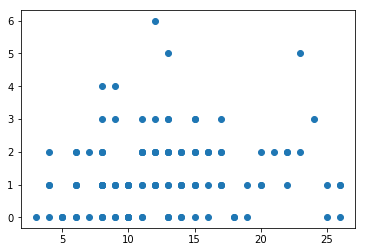

In [26]:
plot = plt.scatter(fifa.Attempts.values, fifa.GoalScored.values)

In [30]:
mlc = MLC(solver='sgd', hidden_layer_sizes=(6,2), alpha=.0001, activation='relu')

In [25]:
plt.show(plot)

In [31]:
x_tr,x_te,y_tr,y_te = tts(df_x,df_y,test_size=.3,random_state=525) 

In [32]:
reg = en.GradientBoostingRegressor()

In [18]:
mlc.fit(x_tr,y_tr)

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
reg.fit(x_tr,y_tr)

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [35]:
pred = reg.predict(x_te)

In [36]:
pred

array([ 1.06403005,  0.93125251,  0.33751552,  0.90926674,  0.19619691,
        0.86740817,  1.05734309,  0.63147136,  0.87156578,  0.8903283 ,
        0.77665211,  0.68180345,  0.20751568,  0.7183826 ,  0.13378089,
        0.52357819, -0.01633331,  0.78039963, -0.07315198,  0.51609156,
        0.00277379,  0.54380574,  0.52678511, -0.0227945 ,  0.67383779,
        0.54671939,  0.50349946,  0.54419945,  0.52375845,  1.16120335,
        0.92847105,  0.2669602 ,  0.79618562,  1.06820919,  0.52499546,
        0.04069668,  0.56970329,  0.78648124,  0.89636519])

In [45]:
y_te.iloc[:,0:1]

,ManoftheMatch
7,1
13,1
98,1
52,1
74,0
79,0
106,1
104,1
108,1
93,1


In [46]:
test = np.array(y_te.iloc[:,0:1])

In [39]:
pred = np.transpose(pred)

In [48]:
print(test.shape)
pred = np.transpose(pred) 
print(pred.shape)

(39, 1)
(39,)


In [53]:
test = np.transpose(test)

In [54]:
test

array([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]], dtype=int64)

In [55]:
pred

array([ 1.06403005,  0.93125251,  0.33751552,  0.90926674,  0.19619691,
        0.86740817,  1.05734309,  0.63147136,  0.87156578,  0.8903283 ,
        0.77665211,  0.68180345,  0.20751568,  0.7183826 ,  0.13378089,
        0.52357819, -0.01633331,  0.78039963, -0.07315198,  0.51609156,
        0.00277379,  0.54380574,  0.52678511, -0.0227945 ,  0.67383779,
        0.54671939,  0.50349946,  0.54419945,  0.52375845,  1.16120335,
        0.92847105,  0.2669602 ,  0.79618562,  1.06820919,  0.52499546,
        0.04069668,  0.56970329,  0.78648124,  0.89636519])

In [57]:
error = test - pred

In [214]:
for i in range(len(pred)):
    if pred[i] > .5:
        pred[i] = 1;
    else:
        pred[i] = 0; 

In [215]:
pred

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1.])

In [216]:
count = 0;

In [217]:
for j in range(len(pred)):
    if pred[i] == test[i]:
        count = count+1;

In [218]:
count

39

In [219]:
range(len(pred))

range(0, 39)

In [220]:
(np.mean((accuracy)**2))**(1/2)

0.5251264020395012